# Preprocessing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [19]:
df = pd.read_csv("/content/scopus.csv")
df.head()

,Unnamed: 0,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,...,Editors,Publisher,PubMed ID,Language of Original Document,Document Type,Publication Stage,Open Access,Source,EID,Country
0,0,Arthur M.P.; Shoba S.; Pandey A.,"Arthur, Menaka Pushpa (56911888400); Shoba, S....",56911888400; 58891555800; 58890648600,A survey of smart dustbin systems using the Io...,2024,Artificial Intelligence Review,57,3,56,...,NaN,Springer Nature,NaN,English,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85185263523,India
1,1,Mishra S.; Jain V.K.; Gyoda K.; Jain S.,"Mishra, Subodh (58073962800); Jain, Vinod Kuma...",58073962800; 55431929500; 6602909462; 57448976800,An efficient content replacement policy to ret...,2024,Ad Hoc Networks,155,NaN,103389,...,NaN,Elsevier B.V.,NaN,English,Article,Final,NaN,Scopus,2-s2.0-85181881743,India
2,2,Snehi M.; Bhandari A.; Verma J.,"Snehi, Manish (49662394600); Bhandari, Abhinav...",49662394600; 54419563300; 57220484806,"Foggier skies, clearer clouds: A real-time IoT...",2024,Computers and Security,139,NaN,103702,...,NaN,Elsevier Ltd,NaN,English,Article,Final,NaN,Scopus,2-s2.0-85182660204,India
3,3,Jasper D.; Khandai S.; Roy N.K.,"Jasper, D. (57207560613); Khandai, Sujit (5705...",57207560613; 57053346600; 56270807900,IoT-Enabled Smart Condition Monitoring Tool fo...,2024,International Journal of Intelligent Systems a...,12,16s,NaN,...,NaN,Ismail Saritas,NaN,English,Article,Final,NaN,Scopus,2-s2.0-85185963334,India
4,4,Puthiyidam J.J.; Joseph S.; Bhushan B.,"Puthiyidam, Jiby J. (58739786800); Joseph, She...",58739786800; 57203077673; 58447338500,Temporal ECDSA: A timestamp and signature mask...,2024,Computer Communications,216,NaN,NaN,...,NaN,Elsevier B.V.,NaN,English,Article,Final,NaN,Scopus,2-s2.0-85183587057,India


In [20]:
df.columns

Index(['Unnamed: 0', 'Authors', 'Author full names', 'Author(s) ID', 'Title',
       'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start',
       'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Author Keywords',
       'Funding Details', 'Funding Texts', 'Correspondence Address', 'Editors',
       'Publisher', 'PubMed ID', 'Language of Original Document',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID',
       'Country'],
      dtype='object')

In [21]:
columns_to_keep = ['Author full names', 'Title', 'Year',
       'Source title', 'Cited by', 'Funding Details',
       'Publisher', 'Language of Original Document', 'Country']

columns_to_drop = []
for cols in df.columns:
  if cols not in columns_to_keep:
    columns_to_drop.append(cols)

trimmed_df = df.drop(columns=columns_to_drop, inplace=False)
trimmed_df.head()

,Author full names,Title,Year,Source title,Cited by,Funding Details,Publisher,Language of Original Document,Country
0,"Arthur, Menaka Pushpa (56911888400); Shoba, S....",A survey of smart dustbin systems using the Io...,2024,Artificial Intelligence Review,NaN,"Vellore Institute of Technology, Chennai, VIT",Springer Nature,English,India
1,"Mishra, Subodh (58073962800); Jain, Vinod Kuma...",An efficient content replacement policy to ret...,2024,Ad Hoc Networks,0.0,NaN,Elsevier B.V.,English,India
2,"Snehi, Manish (49662394600); Bhandari, Abhinav...","Foggier skies, clearer clouds: A real-time IoT...",2024,Computers and Security,0.0,NaN,Elsevier Ltd,English,India
3,"Jasper, D. (57207560613); Khandai, Sujit (5705...",IoT-Enabled Smart Condition Monitoring Tool fo...,2024,International Journal of Intelligent Systems a...,NaN,NaN,Ismail Saritas,English,India
4,"Puthiyidam, Jiby J. (58739786800); Joseph, She...",Temporal ECDSA: A timestamp and signature mask...,2024,Computer Communications,0.0,NaN,Elsevier B.V.,English,India


In [22]:
trimmed_df['Author full names'][0]

'Arthur, Menaka Pushpa (56911888400); Shoba, S. (58891555800); Pandey, Aru (58890648600)'

In [23]:
author_dict={}

# Seggregation of authors
for i in range(0,len(trimmed_df['Author full names'])):
  list_of_names = trimmed_df['Author full names'][i]

  names_list = list_of_names.split(';')

  names = [] # stores the list of all authors of a paper

  # Iterate through each name in the list
  for name in names_list:
      details_dict = {}
      name_parts = name.split('(')
      name = name_parts[0].strip()
      id_number = name_parts[1].rstrip(')').strip()
      names.append(name) # stoers the list of all authors in a paper

      if name in author_dict:
        # Add papaer title
        if 'Paper Names' in author_dict[name]:
          author_dict[name]['Paper Names'].append(trimmed_df['Title'][i])
        else:
          author_dict[name]['Paper Names'] = [trimmed_df['Title'][i]]

        # Cited by info for each paper
        if 'Citations' in author_dict[name]:
          author_dict[name]['Citations'].append(trimmed_df['Cited by'][i])
        else:
          author_dict[name]['Citations'] = [trimmed_df['Cited by'][i]]

        # Year of each paper
        if 'Year of Publishing' in author_dict[name]:
          author_dict[name]['Year of Publishing'].append(trimmed_df['Year'][i])
        else:
          author_dict[name]['Year of Publishing'] = [trimmed_df['Year'][i]]

        # Funding of each paper
        if 'Funding' in author_dict[name]:
          author_dict[name]['Funding'].append(trimmed_df['Funding Details'][i])
        else:
          author_dict[name]['Funding'] = [trimmed_df['Funding Details'][i]]

        # Co-authors each author
        if 'Co-Authors' in author_dict[name]:
          author_dict[name]['Co-Authors'].append(trimmed_df['Cited by'][i])
        else:
          author_dict[name]['Co-Authors'] = [trimmed_df['Cited by'][i]]

      else:
        details_dict['Author ID'] = id_number
        author_dict[name] = details_dict
        author_dict[name]['Paper Names'] = [trimmed_df['Title'][i]]
        author_dict[name]['Citations'] = [trimmed_df['Cited by'][i]]
        author_dict[name]['Year of Publishing'] = [trimmed_df['Year'][i]]
        author_dict[name]['Funding'] = [trimmed_df['Funding Details'][i]]
        author_dict[name]['Country'] = trimmed_df['Country'][i]

  # Create the co-author list
  for author in names:
    # print(author)
    if 'Co-Authors' not in author_dict[author]:
      author_dict[author]['Co-Authors'] = []
    author_dict[author]['Co-Authors'].extend([x for x in names if x != author and type(x)==str])
    # print([x for x in names if x != author])
    author_dict[author]['Co-Authors'] = list([x for x in set(author_dict[author]['Co-Authors']) if type(x)==str])
    #print(author_dict[author]['Co-Authors'])

In [24]:
author_dict

{'Arthur, Menaka Pushpa': {'Author ID': '56911888400',
  'Paper Names': ['A survey of smart dustbin systems using the IoT and deep learning'],
  'Citations': [nan],
  'Year of Publishing': [2024],
  'Funding': ['Vellore Institute of Technology, Chennai, VIT'],
  'Country': 'India',
  'Co-Authors': ['Pandey, Aru', 'Shoba, S.']},
 'Shoba, S.': {'Author ID': '58891555800',
  'Paper Names': ['A survey of smart dustbin systems using the IoT and deep learning'],
  'Citations': [nan],
  'Year of Publishing': [2024],
  'Funding': ['Vellore Institute of Technology, Chennai, VIT'],
  'Country': 'India',
  'Co-Authors': ['Pandey, Aru', 'Arthur, Menaka Pushpa']},
 'Pandey, Aru': {'Author ID': '58890648600',
  'Paper Names': ['A survey of smart dustbin systems using the IoT and deep learning'],
  'Citations': [nan],
  'Year of Publishing': [2024],
  'Funding': ['Vellore Institute of Technology, Chennai, VIT'],
  'Country': 'India',
  'Co-Authors': ['Shoba, S.', 'Arthur, Menaka Pushpa']},
 'Mishra, 

In [25]:
# Save the dictionary variable to storage

with open('author_dict.pickle', 'wb') as handle:
    pickle.dump(author_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('trimmed_df.pickle', 'wb') as handle:
    pickle.dump(trimmed_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Query Initiation after Preprocessing of our Data

## Loading variables, etc...

In [26]:
# Load the dictionary variable from storage

with open('trimmed_df.pickle', 'rb') as handle:
    trimmed_df = pickle.load(handle)

with open('author_dict.pickle', 'rb') as handle:
    AD = pickle.load(handle)

In [27]:
# To pretty-print the author dictionary

import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(AD)

Streaming output truncated to the last 5000 lines.
                                              'Green internet of things using '
                                              'UAVs in B5G networks: A review '
                                              'of applications and strategies',
                                              'A ReRAM Physically Unclonable '
                                              'Function (ReRAM PUF)-Based '
                                              'Approach to Enhance '
                                              'Authentication Security in '
                                              'Software Defined Wireless '
                                              'Networks'],
                           'Year of Publishing': [   2022,
                                                     2021,
                                                     2022,
                                                     2022,
                                       

KeyboardInterrupt: 

In [28]:
AD['Shi, Weisong']['Citations']

[0.0,
 22.0,
 11.0,
 13.0,
 41.0,
 5.0,
 159.0,
 4.0,
 0.0,
 6.0,
 1.0,
 22.0,
 11.0,
 13.0,
 41.0,
 5.0,
 159.0,
 4.0,
 5049.0]

## (a) Highest cited author and his h-index

In [29]:
# Function to find the maximum of all the citations per author

max_cite_author = [] # There can be multiple such authors
max_cite_value = 0

for i in AD:
  total_citation = np.array(AD[i]['Citations']).sum()
  if total_citation >  max_cite_value:
    max_cite_value = total_citation
    max_cite_author = [i]
  elif total_citation == max_cite_value:
    max_cite_author.append(i)

In [30]:
def h_index(L: list) -> int:
  L.sort(reverse = True)
  ans = 0
  for idx, val in enumerate(L):
    if val >= idx:
      ans += 1
    else:
      break
  return ans

In [31]:
# Storing the details of the maximum cited authors in a df

dfa = []
for highest_author in max_cite_author:
  temp_list = []
  temp_list.extend([highest_author,
                    AD[highest_author]['Author ID'],
                    max_cite_value,
                    h_index(AD[highest_author]['Citations'])])
  dfa.append(temp_list)

Qa = pd.DataFrame(dfa, columns=['Author Name', 'Author ID', 'Total Citations', 'H-index'])
Qa

,Author Name,Author ID,Total Citations,H-index
0,"Xu, Li Da",13408889400,13603.0,45


## (b) Highest publication author

In [32]:
# Function to find the maximum of all the pulications per author

max_publication_author = [] # There can be multiple such authors
max_pub_value = 0

for i in AD.keys():
  total_pub = len(AD[i]['Paper Names'])
  if total_pub >  max_pub_value:
    max_pub_value = total_pub
    max_publication_author = [i]

  elif total_pub == max_pub_value:
    max_publication_author.append(i)

In [33]:
# Storing the details of the maximum cited authors in a df

dfb = []
for highest_author in max_publication_author:
  temp_list = []
  temp_list.extend([highest_author,
                    AD[highest_author]['Author ID'],
                    max_pub_value])
  dfb.append(temp_list)

Qb = pd.DataFrame(dfb, columns=['Author Name', 'Author ID', 'Total Publications'])
Qb

,Author Name,Author ID,Total Publications
0,"Choo, Kim-Kwang Raymond",57208540261,243


## (c) Highest cited author's avg. citations and country name

In [36]:
dfc = []
for highest_author in max_cite_author:
  temp_list = []
  temp_list.extend([highest_author,
                    AD[highest_author]['Author ID'],
                    len(AD[highest_author]['Paper Names']),
                    max_cite_value/len(AD[highest_author]['Paper Names']),
                    AD[highest_author]['Country']])
  dfc.append(temp_list)

Qc = pd.DataFrame(dfc, columns=['Author Name', 'Author ID', 'Total Citations', 'Average Citations','Country'])
Qc

,Author Name,Author ID,Total Citations,Average Citations,Country
0,"Xu, Li Da",13408889400,53,256.660377,India


## (d) Total number of publications of the highest cited author

In [37]:
dfd = []
for highest_author in max_cite_author:
  temp_list = []
  temp_list.extend([highest_author,
                    AD[highest_author]['Author ID'],
                    max_cite_value])
  dfd.append(temp_list)

Qd = pd.DataFrame(dfd, columns=['Author Name', 'Author ID', 'Total Publications'])
Qd

,Author Name,Author ID,Total Publications
0,"Xu, Li Da",13408889400,13603.0


## (e) Total publications in a year

In [38]:
publication_by_year = trimmed_df.groupby('Year')['Title'].count()

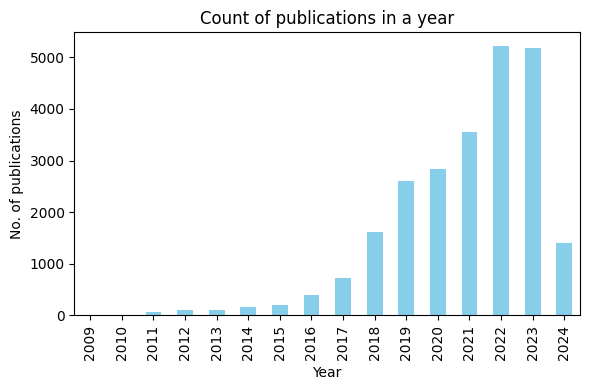

In [39]:
# Display a comparison plot

plt.figure(figsize=(6, 4))
publication_by_year.plot(x='Year', y='count', kind='bar', color='skyblue')
plt.title('Count of publications in a year')
plt.xlabel('Year')
plt.ylabel('No. of publications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## (f) Total citations in a year

In [40]:
citation_by_year = trimmed_df.groupby('Year')['Cited by'].sum()

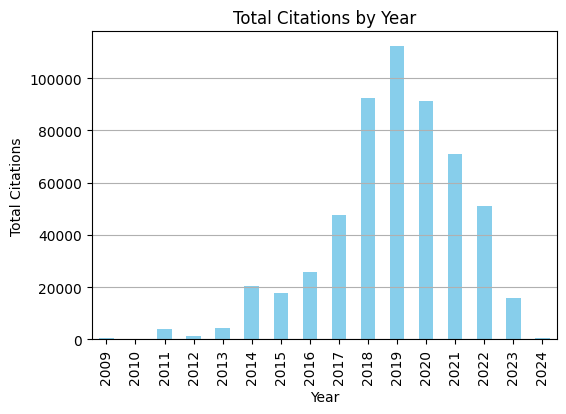

In [41]:
plt.figure(figsize=(6, 4))
citation_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Citations by Year')
plt.xlabel('Year')
plt.ylabel('Total Citations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## (g) Author(country) having highest co-authorship with indian authors
**[ *not possible on the data!!* ]**

## (h) Highest cited author from India and the university

In [42]:
# Function to find the maximum of all the citations per author from India

max_cite_author_india = [] # There can be multiple such authors
max_cite_value_india = 0

for i in AD:
  if AD[i]['Country'] == 'India':
    total_citation = np.array(AD[i]['Citations']).sum()
    if total_citation >  max_cite_value:
      max_cite_value_india = total_citation
      max_cite_author_india = [i]
    elif total_citation == max_cite_value_india:
      max_cite_author_india.append(i)

In [43]:
# Storing the details of the maximum cited authors in a df

dfh = []
for highest_author in max_cite_author_india:
  temp_list = []
  temp_list.extend([highest_author,
                    AD[highest_author]['Author ID'],
                    AD[highest_author]['Country'],
                    max_cite_value_india])
  dfh.append(temp_list)

Qh = pd.DataFrame(dfh, columns=['Author Name', 'Author ID', 'Country', 'Total Citations'])
Qh

,Author Name,Author ID,Country,Total Citations
0,"Mishra, Subodh",58073962800,India,0
1,"Jain, Vinod Kumar",55431929500,India,0
2,"Gyoda, Koichi",6602909462,India,0
3,"Jain, Samkit",57448976800,India,0
4,"Snehi, Manish",49662394600,India,0
...,...,...,...,...
2883,"Jaya Pradha, J.",57192382801,India,0
2884,"Venkatesh, D.N.",57213307927,India,0
2885,"Vishnu Priya, M.M.",57192375581,India,0
2886,"Takeda, Satoshi",57188927154,India,0


## (i) Comparative year wise article publication analysis of india, china and usa

In [44]:
year_and_country_wise_publication = trimmed_df.groupby(['Country','Year']).count()

In [45]:
year_and_country_wise_publication

Author full names  Title  Source title  Cited by  \
Country Year                                                     
China   2010                  2      2             2         2   
        2011                 54     54            54        54   
        2012                102    102           102       102   
        2013                 93     93            93        93   
        2014                 95     95            95        95   
        2015                111    111           111       111   
        2016                209    209           209       209   
        2017                311    311           311       311   
        2018                773    773           773       773   
        2019               1343   1343          1343      1343   
        2020               1524   1524          1524      1523   
        2021               1886   1886          1886      1886   
        2022               2793   2793          2793      2793   
        2023               2618   2618          2618      2616   
        2024                752    752           752       654   
India   2013                  3      3             3         3   
        2014                  3      3             3         3   
        2015                 19     19            19        19   
        2016                 51     51            51        51   
        2017                142    142           142       142   
        2018                360    360           360       360   
        2019                626    626           626       626   
        2020                682    682           682       682   
        2021               1005   1005          1005      1005   
        2022               1573   1573          1573      1573   
        2023               1746   1746          1746      1730   
        2024                469    469           469       335   
USA     2009                  2      2             2         2   
        2010                  2      2             2         2   
        2011                  7      7             7         7   
        2012                  6      6             6         6   
        2013                 12     12            12        12   
        2014                 63     63            63        63   
        2015                 74     74            74        74   
        2016                130    130           130       130   
        2017                268    268           268       268   
        2018                488    488           488       488   
        2019                642    642           642       642   
        2020                637    637           637       637   
        2021                671    671           671       671   
        2022                856    856           856       856   
        2023                812    812           812       810   
        2024                184    184           184       159   

              Funding Details  Publisher  Language of Original Document  
Country Year                                                             
China   2010                0          1                              2  
        2011                6          3                             54  
        2012                6          3                            102  
        2013               25         24                             93  
        2014               58         90                             95  
        2015               48        111                            111  
        2016              107        209                            209  
        2017              230        311                            311  
        2018              664        773                            773  
        2019             1179       1343                           1343  
        2020             1262       1524                           1524  
        2021             1185       1886                           1886  
       

## (j) Total number of grants given to the *field*

In [46]:
funding_count = trimmed_df['Funding Details'].dropna().count()

In [47]:
print(f'Total number of grants/fundings given to the field: ', funding_count)

Total number of grants/fundings given to the field:  12214


## (k) Country wise total number of publication

In [ ]:
publication_per_country = AD.groupby('Country')[]

# Generation of Co-author data

In [48]:
Author_relations = list()

for author_1 in AD:
  for author_2 in AD[author_1]['Co-Authors']:
    temp_edge = [author_1]
    temp_edge.append(author_2)
    temp_edge.sort()
    Author_relations.append(tuple(temp_edge))

print(len(Author_relations))
Author_relations = list(set(Author_relations))
print(len(Author_relations))

316410
158205


In [49]:
database_for_neo4j = pd.DataFrame(Author_relations, columns=['Author 1', 'Author 2'])

In [50]:
database_for_neo4j

,Author 1,Author 2
0,"Eryilmaz, Atilla","Shroff, Ness B."
1,"Barbhuiya, Ferdous Ahmed","De, Debashis"
2,"Om, Hari","Rangwani, Diksha"
3,"Li, Yiran","Xu, Jie"
4,"Cao, Xuelin","Elmossallamy, Mohamed A."
...,...,...
158200,"Ping, Zhang","Sixian, Wang"
158201,"Shitharth, S.","Yonbawi, Saud"
158202,"Nimmy, K.","Sankaran, Sriram"
158203,"Irin Loretta, G.","Kavitha, V."


In [51]:
database_for_neo4j.to_csv('database_for_neo4j.csv', index=False)